In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import statistics # for variance
from scipy import stats # calculate trimmed mean

pd.set_option('display.max_rows', 426)

na_vals = ['-1', 1]
indian_food = pd.read_csv("indian_food.csv", na_values=na_vals)
indian_food['ingredients'] = indian_food['ingredients'].apply(lambda x: x.lower())

In [2]:
indian_food['num_ingr'] = indian_food['ingredients'].apply(lambda x: len(x.split(',')))

In [3]:
indian_food.head(2)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,num_ingr
0,Balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East,4
1,Boondi,"gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West,3


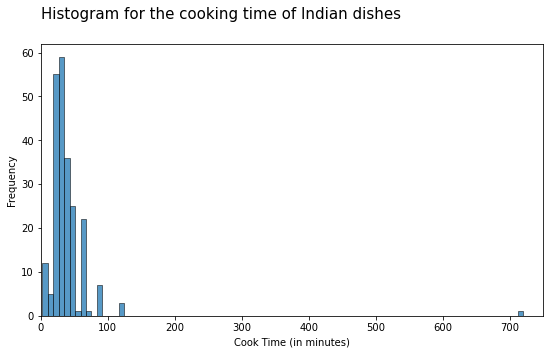

In [4]:
plt.figure(figsize=(9,5))
sns.histplot(indian_food, x="cook_time")

plt.title("Histogram for the cooking time of Indian dishes", fontsize=15, loc='left', y=1.07)
plt.xlabel("Cook Time (in minutes)")
plt.ylabel("Frequency")
plt.xlim(0, 750)

plt.show()

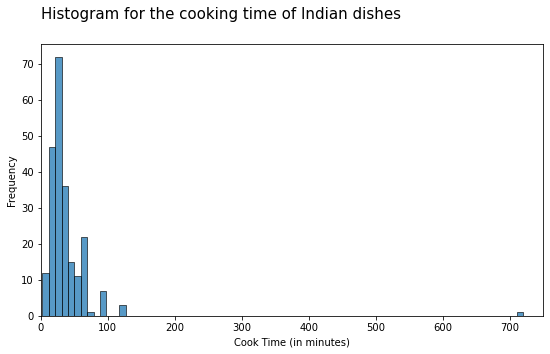

In [5]:
plt.figure(figsize=(9,5))
sns.histplot(indian_food, x="cook_time", bins=75)

plt.title("Histogram for the cooking time of Indian dishes", fontsize=15, loc='left', y=1.07)
plt.xlabel("Cook Time (in minutes)")
plt.ylabel("Frequency")
plt.xlim(0, 750)

plt.show()

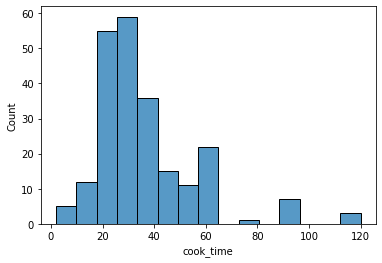

In [6]:
no_720 = (indian_food['cook_time'] == 720)
cook_time = indian_food.loc[~no_720]
plt.figure()
sns.histplot(cook_time, x="cook_time")
plt.show()

In [7]:
round(cook_time.describe(),1)

,prep_time,cook_time,num_ingr
count,224.0,226.0,254.0
mean,35.5,35.9,4.5
std,76.4,19.6,1.2
min,5.0,2.0,2.0
25%,10.0,20.0,4.0
50%,10.0,30.0,5.0
75%,20.0,45.0,5.0
max,500.0,120.0,10.0


C:\Users\keelji\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


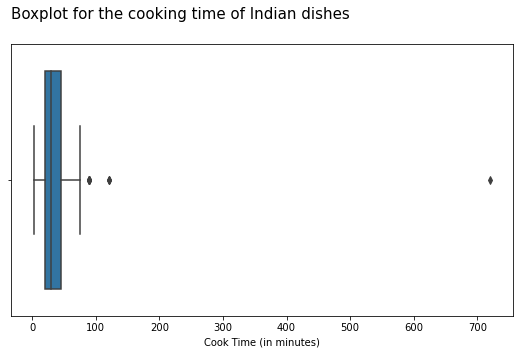

In [8]:
plt.figure(figsize=(9,5))
sns.boxplot(indian_food['cook_time'], data=indian_food) #, color='magenta', palette='PuBuGn_r'
plt.title("Boxplot for the cooking time of Indian dishes", fontsize=15, loc='left', y=1.07)
plt.xlabel("Cook Time (in minutes)") #, color='grey'
#plt.xlim(0, 750)

plt.show()

C:\Users\keelji\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


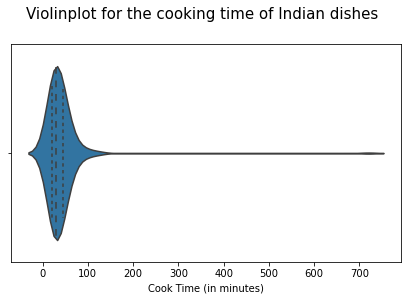

In [31]:
plt.figure(figsize=(7,4))
sns.violinplot(indian_food['cook_time'], inner="quartile")
plt.title("Violinplot for the cooking time of Indian dishes", fontsize=15, loc='left', y=1.09, x=0.04)
plt.xlabel("Cook Time (in minutes)") #, color='grey'
plt.show()

C:\Users\keelji\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


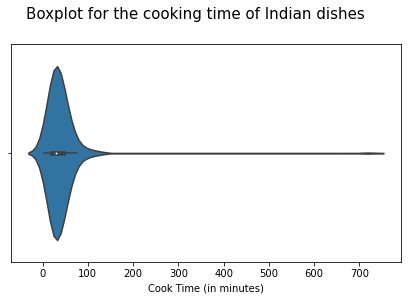

In [30]:
plt.figure(figsize=(7,4))
sns.violinplot(indian_food['cook_time'])

plt.title("Boxplot for the cooking time of Indian dishes", fontsize=15, loc='left', y=1.09, x=0.04)
plt.xlabel("Cook Time (in minutes)") #, color='grey'

plt.show()

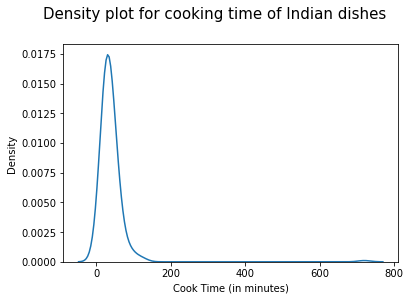

In [48]:
plt.figure()
sns.kdeplot(data=indian_food, x='cook_time')

plt.title("Density plot for cooking time of Indian dishes", fontsize=15, loc='left', y=1.09, x=-0.06)
plt.xlabel("Cook Time (in minutes)") #, color='grey'

plt.show()

C:\Users\keelji\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


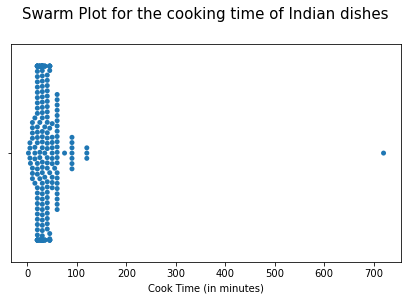

In [32]:
plt.figure(figsize=(7,4))
sns.swarmplot(x=indian_food["cook_time"])

plt.title("Swarm Plot for the cooking time of Indian dishes", fontsize=15, loc='left', y=1.09, x=0.03)
plt.xlabel("Cook Time (in minutes)") #, color='grey'

plt.show()

C:\Users\keelji\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


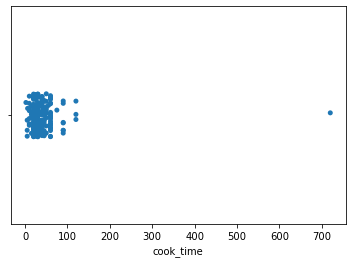

In [12]:
sns.stripplot(indian_food["cook_time"])
plt.show()

In [ ]:
plt.figure()
sns.kdeplot(data=indian_food, x='cook_time')
plt.title("Density plot for cooking time of Indian dishes", fontsize=15, loc='left', y=1.07)
plt.xlabel("Cook Time (in minutes)") #, color='grey'
#plt.xlim(0, 600)

plt.show()

In [ ]:
round(indian_food[['cook_time', 'num_ingr']].describe(),1)